<a href="https://www.kaggle.com/code/stanleyosondu/room-occpancy-prediction?scriptVersionId=106765724" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve

In [3]:
dfo= pd.read_csv("../input/room-occupancy/file.csv")
dfo

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.700000,26.272000,585.200000,749.200000,0.004764,1
1,23.718000,26.290000,578.400000,760.400000,0.004773,1
2,23.730000,26.230000,572.666667,769.666667,0.004765,1
3,23.722500,26.125000,493.750000,774.750000,0.004744,1
4,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
2660,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2661,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2662,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2663,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [4]:
print(dfo.shape)

(2665, 6)


In [5]:
#Checking for missing values

dfo.isnull().sum()

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [6]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    2665 non-null   float64
 1   Humidity       2665 non-null   float64
 2   Light          2665 non-null   float64
 3   CO2            2665 non-null   float64
 4   HumidityRatio  2665 non-null   float64
 5   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 125.0 KB


In [7]:
dfo.skew()

Temperature      0.842562
Humidity         0.672762
Light            0.759940
CO2              0.787597
HumidityRatio    0.649385
Occupancy        0.562365
dtype: float64

In [8]:
dfo.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [9]:
dfo['Occupancy'].value_counts()

0    1693
1     972
Name: Occupancy, dtype: int64

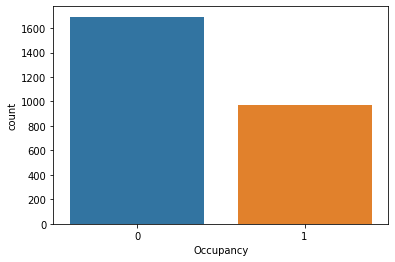

In [10]:
#Histogram showing distribution of 'OCCUPANCY'

sns.countplot(data = dfo , x = 'Occupancy')
plt.show()

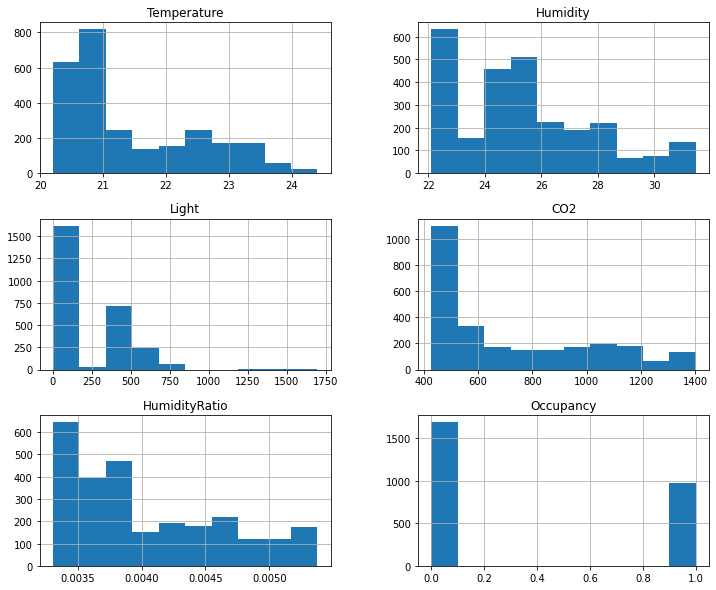

In [11]:
dfo.hist(figsize=(12,10))
plt.show()

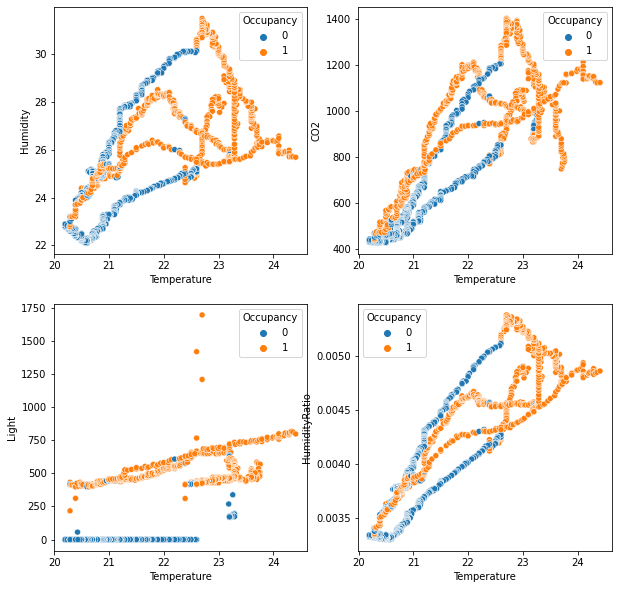

In [12]:
fig,x = plt.subplots(2,2, figsize=(10,10))
cols = ['Humidity', 'Light', 'CO2', 'HumidityRatio']
for n in range(4):
    sns.scatterplot(data=dfo, y=cols[n], x='Temperature',  hue='Occupancy', ax=x[n%2,n//2])

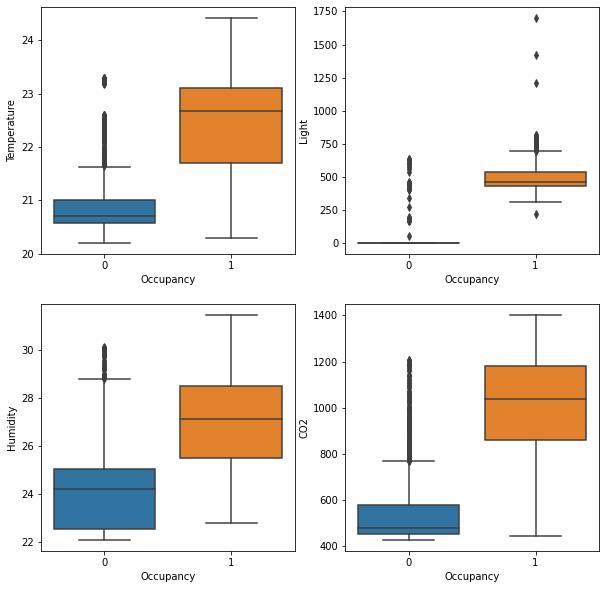

In [13]:
fig,x = plt.subplots(2,2, figsize=(10,10))
cols = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
for n in range(4):
    sns.boxplot(x='Occupancy', y=cols[n], data=dfo, ax=x[n%2,n//2])

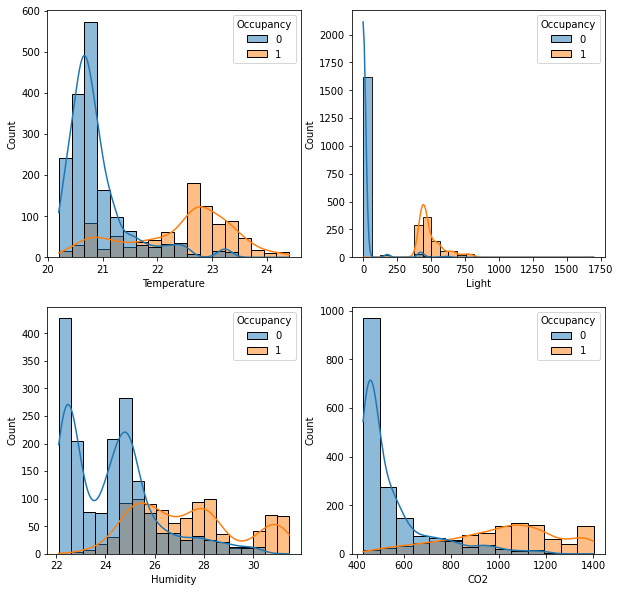

In [14]:
fig.clear()
fig,x = plt.subplots(2,2, figsize=(10,10))
for n in range(4):
    sns.histplot(kde=True, data=dfo, x=cols[n], hue='Occupancy', ax= x[n%2, n//2])

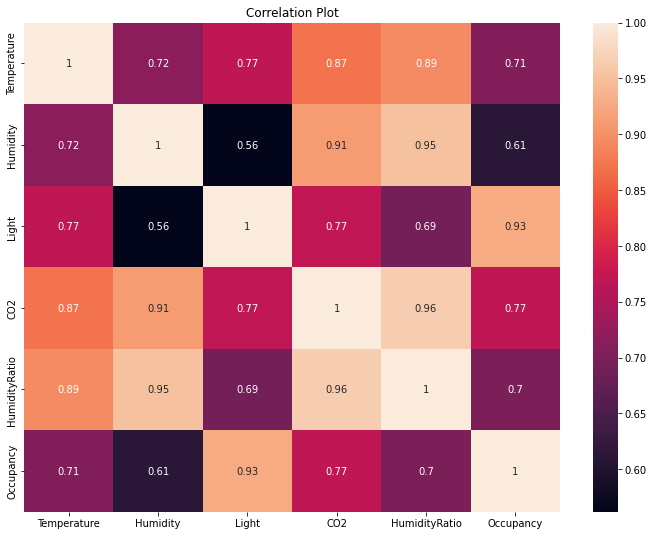

In [15]:
#Correlation Plot
plt.figure(figsize=(12,9))
df = sns.heatmap(dfo.corr(), annot = True)
df.set(title = "Correlation Plot")
plt.show()

In [16]:
#Removing the HumidityRatio attribute which is least correlated to the target attribute 
y=dfo['Occupancy']
X = dfo.drop(['HumidityRatio','Occupancy'], axis = 1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)

x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [19]:
pd.DataFrame(x_train)

,0,1,2,3
0,-0.719818,-0.312067,-0.773487,-0.831072
1,-0.816141,-0.473983,-0.773487,-0.887426
2,2.198763,0.372031,1.340747,0.254783
3,-1.201432,-1.004260,-0.773487,-0.947648
4,0.147087,1.320592,-0.773487,0.721312
...,...,...,...,...
1860,-0.536805,-0.909134,-0.773487,-0.768831
1861,-0.430850,0.305240,-0.773487,-0.373235
1862,-0.848249,-0.514462,-0.773487,-0.859670
1863,0.050764,-0.514462,-0.773487,-0.341834


In [20]:
# Create logisticRegression model and fit it on scaled X train 

lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
lr_score = accuracy_score(y_test, y_pred)

In [21]:
print(classification_report(y_test, y_pred))
print("Accuracy Score of Logistic Regression:",lr_score*100,'\n')

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       517
           1       0.94      1.00      0.97       283

    accuracy                           0.98       800
   macro avg       0.97      0.98      0.97       800
weighted avg       0.98      0.98      0.98       800

Accuracy Score of Logistic Regression: 97.625 



Confusion Matrix is : 
 [[499  18]
 [  1 282]]


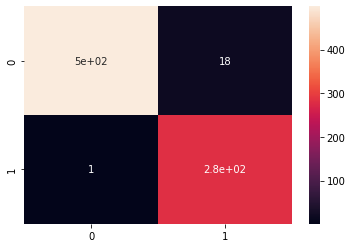

In [22]:
#Calculating Confusion Matrix
Con_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', Con_mat)

# drawing confusion matrix
sns.heatmap(Con_mat, annot = True )
plt.show()

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_score = accuracy_score(y_test, y_pred)

In [24]:
print(classification_report(y_test, y_pred))
print("Accuracy Score of KNN:",knn_score*100,'\n')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       517
           1       0.98      0.99      0.98       283

    accuracy                           0.99       800
   macro avg       0.98      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800

Accuracy Score of KNN: 98.75 



Confusion Matrix is : 
 [[510   7]
 [  3 280]]


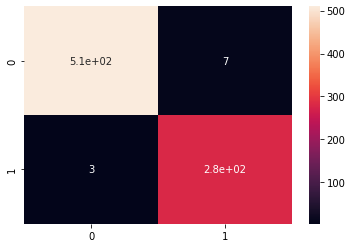

In [25]:
#Calculating Confusion Matrix
Con_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', Con_mat)

# drawing confusion matrix
sns.heatmap(Con_mat, annot = True )
plt.show()

In [26]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
dt_score = accuracy_score(y_test, y_pred)

In [27]:
print(classification_report(y_test, y_pred))
print("Accuracy Score of Decision Tree:",dt_score*100,'\n')

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       517
           1       0.97      0.98      0.98       283

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800

Accuracy Score of Decision Tree: 98.25 



In [28]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X, y)

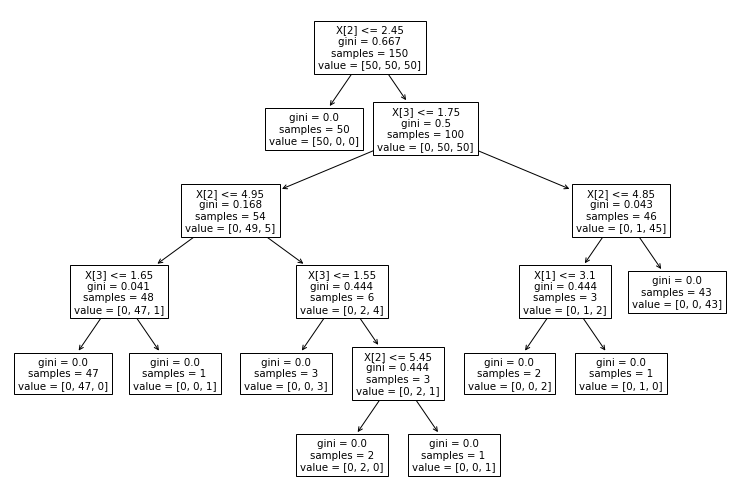

In [29]:
plt.figure(figsize=(13,9))
tree.plot_tree(dt)
plt.show()

In [30]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
svm_score = accuracy_score(y_test, y_pred)

In [31]:
print(classification_report(y_test, y_pred))
print("Accuracy Score of SVM:",svm_score*100,'\n')

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       517
           1       0.94      1.00      0.97       283

    accuracy                           0.98       800
   macro avg       0.97      0.98      0.97       800
weighted avg       0.98      0.98      0.98       800

Accuracy Score of SVM: 97.625 



Confusion Matrix is : 
 [[498  19]
 [  0 283]]


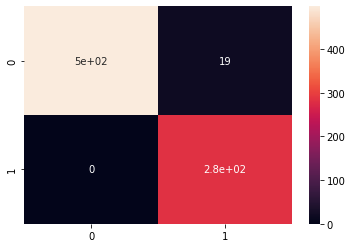

In [32]:
#Calculating Confusion Matrix
Con_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', Con_mat)

# drawing confusion matrix
sns.heatmap(Con_mat, annot = True )
plt.show()

In [33]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)
gbc_score = accuracy_score(y_test, y_pred)

In [34]:
print(classification_report(y_test, y_pred))
print("Accuracy Score of Gradient Boosting:",gbc_score*100,'\n')

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       517
           1       0.97      1.00      0.98       283

    accuracy                           0.99       800
   macro avg       0.98      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800

Accuracy Score of Gradient Boosting: 98.625 



**RANDOM FOREST**

In [35]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
rf_acc_score = accuracy_score(y_test, y_pred)

In [36]:
print(classification_report(y_test, y_pred))
print("Accuracy Score of Random Forest:",rf_acc_score*100,'\n')

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       517
           1       0.97      1.00      0.98       283

    accuracy                           0.99       800
   macro avg       0.98      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800

Accuracy Score of Random Forest: 98.625 



Confusion Matrix is : 
 [[507  10]
 [  1 282]]


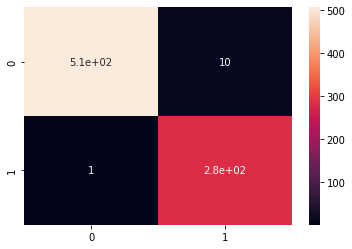

In [37]:
#Calculating Confusion Matrix
Con_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', Con_mat)

# drawing confusion matrix
sns.heatmap(Con_mat, annot = True )
plt.show()

**CHECKING FEATURE IMPORTANCE**

In [38]:
rf.feature_importances_

array([0.14794606, 0.03186422, 0.58560522, 0.2345845 ])

In [39]:
features = pd.DataFrame(index = X_train.columns, data = rf.feature_importances_ , columns = ['Importance'])
Important_features = features.sort_values('Importance')
Important_features.style.background_gradient(axis=0)

,Importance
Humidity,0.031864
Temperature,0.147946
CO2,0.234584
Light,0.585605


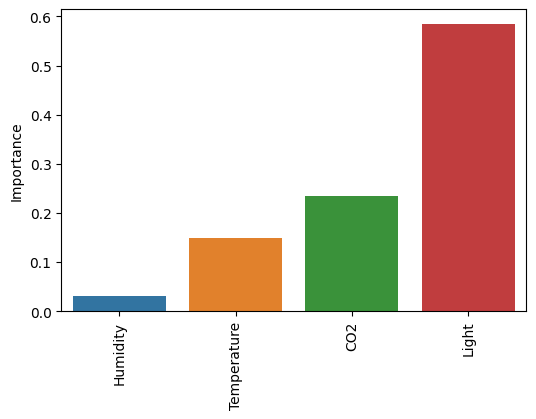

In [40]:
plt.figure(figsize=(6,4),dpi = 100)
sns.barplot(data = features.sort_values('Importance') , x = features.sort_values('Importance').index , y = 'Importance')
plt.xticks(rotation = 90);

**Conclusion:**

By checking the feature importance, we can assume that Light is the most important feature of classification.

**ACCURACY COMPARISON OF MACHINE LEARNING MODELS USED**

In [41]:
print('LogReg Accuracy = {:.2f}'.format(lr.score(x_test,y_test)))
print('RandFor Accuracy = {:.2f}'.format(rf.score(x_test,y_test)))
print('SVC Accuracy = {:.2f}'.format(svc.score(x_test,y_test)))
print('KNN Accuracy = {:.2f}'.format(knn.score(x_test,y_test)))
print('GBC Accuracy = {:.2f}'.format(knn.score(x_test,y_test)))
print('DT Accuracy = {:.2f}'.format(dt.score(x_test,y_test)))

LogReg Accuracy = 0.98
RandFor Accuracy = 0.99
SVC Accuracy = 0.98
KNN Accuracy = 0.99
GBC Accuracy = 0.99
DT Accuracy = 0.65


In [42]:
#VALUE COUNT
y_train.value_counts()

0    1176
1     689
Name: Occupancy, dtype: int64

In [43]:
pip install --user

ERROR: You must give at least one requirement to install (see "pip help install")
Note: you may need to restart the kernel to use updated packages.


In [44]:
#Let's Load keras 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss",
                               mode = 'auto',
                               patience=15)

In [45]:
# defining model
model = keras.Sequential()
model.add(layers.Dense(20, activation='relu', input_dim=9))
model.add(layers.Dense(1))

2022-09-28 21:12:09.293555: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [46]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# train set / data 
x_train = x_train.reshape(-1, 28*28)
x_train = x_train.astype('float32') / 255

# train set / target 
y_train = tf.keras.utils.to_categorical(y_train , num_classes=10)

11501568/11490434 [==============================] - 0s 0us/step


In [47]:
# test set / data 
x_test = x_test.reshape(-1, 28*28)
x_test = x_test.astype('float32') / 255

# train set / target 
y_test = tf.keras.utils.to_categorical(y_test , num_classes=10)

In [48]:
opt = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=opt,metrics=['accuracy'])

In [49]:
from keras.models import Sequential
from keras.layers import Activation, Dense

model = Sequential()
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=75, epochs=30, verbose=1)

2022-09-28 21:12:10.551834: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
800/800 [==============================] - 5s 6ms/step - loss: 0.8406 - accuracy: 0.8188 - val_loss: 0.4472 - val_accuracy: 0.8932
Epoch 2/30
800/800 [==============================] - 4s 5ms/step - loss: 0.4099 - accuracy: 0.8932 - val_loss: 0.3511 - val_accuracy: 0.9089
Epoch 3/30
800/800 [==============================] - 5s 6ms/step - loss: 0.3454 - accuracy: 0.9059 - val_loss: 0.3099 - val_accuracy: 0.9175
Epoch 4/30
800/800 [==============================] - 4s 5ms/step - loss: 0.3121 - accuracy: 0.9137 - val_loss: 0.2860 - val_accuracy: 0.9224
Epoch 5/30
800/800 [==============================] - 4s 5ms/step - loss: 0.2890 - accuracy: 0.9196 - val_loss: 0.2677 - val_accuracy: 0.9263
Epoch 6/30
800/800 [==============================] - 4s 5ms/step - loss: 0.2716 - accuracy: 0.9251 - val_loss: 0.2539 - val_accuracy: 0.9299
Epoch 7/30
800/800 [==============================] - 4s 5ms/step - loss: 0.2571 - accuracy: 0.9289 - val_loss: 0.2414 - val_accuracy: 0.9327
Epoch 

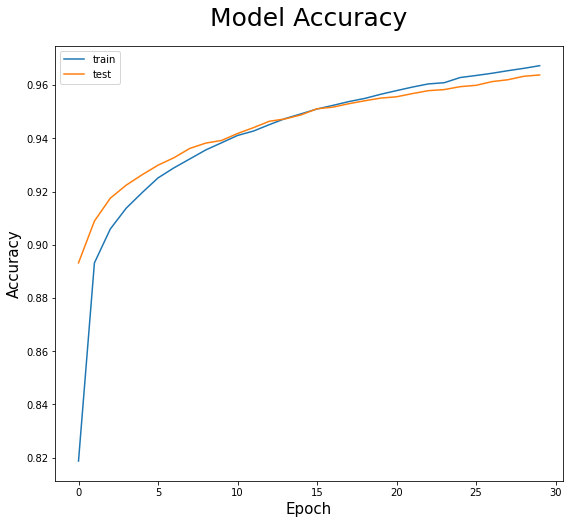

In [50]:
# Plotting the Model Accuracy & Model Loss vs Epochs (Hidden Input)
plt.figure(figsize=[20,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()